In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

df_ord = pd.read_csv('Raymond_Liang/data/Orders.csv')
df_ret = pd.read_csv('Raymond_Liang/data/Returns.csv')

In [5]:
df_ord.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [6]:
x = ['Profit', 'Sales']

df_ord[x] = df_ord[x].apply(lambda x: x.str.replace('$', ''))
df_ord[x] = df_ord[x].apply(lambda x: x.str.replace(',', ''))
df_ord[x] = df_ord[x].astype('float64')

In [115]:
df_ord

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.00,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.10,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.10,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.10,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.00,$311.52,903.040,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.10,$763.28,897.350,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.00,$564.84,894.770,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.00,$996.48,878.380,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.00,$54.71,25.270,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.20,$5.48,11.130,High


In [7]:
df_ord['Year'] = pd.DatetimeIndex(df_ord['Order.Date']).year

In [8]:
df_ord = df_ord.drop('Postal.Code', axis = 1)

In [9]:
df_ret.shape

(1079, 3)

In [10]:
df_ret.nunique()

Returned       1
Order ID    1079
Region        24
dtype: int64

In [11]:
df_tot = pd.merge(df_ord, df_ret, left_on = 'Order.ID', right_on = 'Order ID', how = 'left')
df_tot

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Year,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,221.98,2,0.00,62.15,40.770,High,2014,NaN,NaN,NaN
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.40,9,0.10,-288.77,923.630,Critical,2014,NaN,NaN,NaN
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.17,9,0.10,919.97,915.490,Medium,2014,NaN,NaN,NaN
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,2892.51,5,0.10,-96.54,910.160,Medium,2014,NaN,NaN,NaN
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,2832.96,8,0.00,311.52,903.040,Critical,2014,NaN,NaN,NaN
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,Sydney,New South Wales,...,2862.68,5,0.10,763.28,897.350,Critical,2014,NaN,NaN,NaN
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,Porirua,Wellington,...,1822.08,4,0.00,564.84,894.770,Critical,2012,NaN,NaN,NaN
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,Hamilton,Waikato,...,5244.84,6,0.00,996.48,878.380,High,2013,NaN,NaN,NaN
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,341.96,2,0.00,54.71,25.270,High,2014,NaN,NaN,NaN
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,...,48.71,1,0.20,5.48,11.130,High,2012,NaN,NaN,NaN


In [12]:
df_tot = df_tot.rename(index = str, columns = {'Region_x': 'Region'})

In [10]:
df_tot = df_tot.drop(['Order ID', 'Region_y'], axis = 1)
df_tot[df_tot.Returned.isnull()] = ''

In [11]:
df_tot.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'Year', 'Returned'],
      dtype='object')

In [13]:
#3.1
bars_profit = df_tot.groupby('Year').agg({'Sales':'sum'})
bars_loss = df_tot[df_tot.Returned == 'Yes'].groupby('Year').agg({'Sales':'sum'})

<BarContainer object of 4 artists>

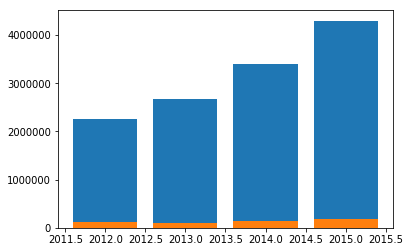

In [31]:
plt.bar(bars_profit.index, bars_profit['Sales'])
plt.bar(bars_loss.index, bars_loss['Sales'])

<BarContainer object of 4 artists>

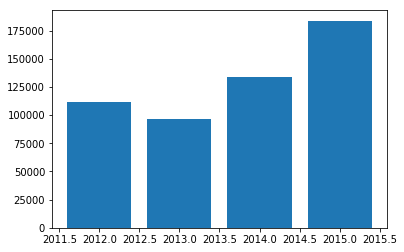

In [32]:
plt.bar(bars_loss.index, bars_loss['Sales'])

In [43]:
return_customers = df_tot[df_tot.Returned == 'Yes'].groupby('Customer.ID').agg({'Sales':'count'}).rename(columns={'Sales': 'NumberofSales'})


In [58]:
#3.2
return_customers = df_tot[df_tot.Returned == 'Yes'].groupby('Customer.ID').agg(
    {'Sales':'count'}).rename(
    columns={'Sales': 'NumberofSales'})
print('More than 1 Return: ', len(return_customers[return_customers.NumberofSales > 1]))
print('More than 5 Return: ', len(return_customers[return_customers.NumberofSales > 5]))

More than 1 Return:  547
More than 5 Return:  46


In [85]:
sales_count = return_customers.reset_index().groupby(
    'NumberofSales').agg(
    'count').rename(
    columns={'Customer.ID': 'TotalSalesCount'})

top_repeat =  sales_count[sales_count.index > 5]

In [86]:
top_repeat

,TotalSalesCount
NumberofSales,
6,20
7,14
8,6
9,2
10,2
11,1
13,1


<BarContainer object of 12 artists>

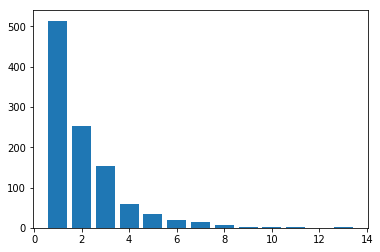

In [87]:
plt.bar(sales_count.index, sales_count['TotalSalesCount'])

<BarContainer object of 7 artists>

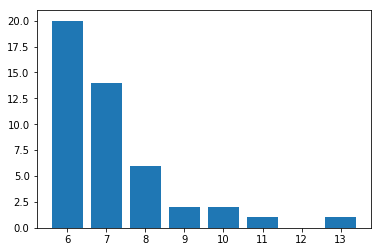

In [88]:
plt.bar(top_repeat.index, top_repeat['TotalSalesCount'])


In [113]:
#3.3
countries = df_tot[df_tot.Returned == 'Yes'].groupby('Region').agg({'Sales':'count'}).sort_values(by = 'Sales', ascending = False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

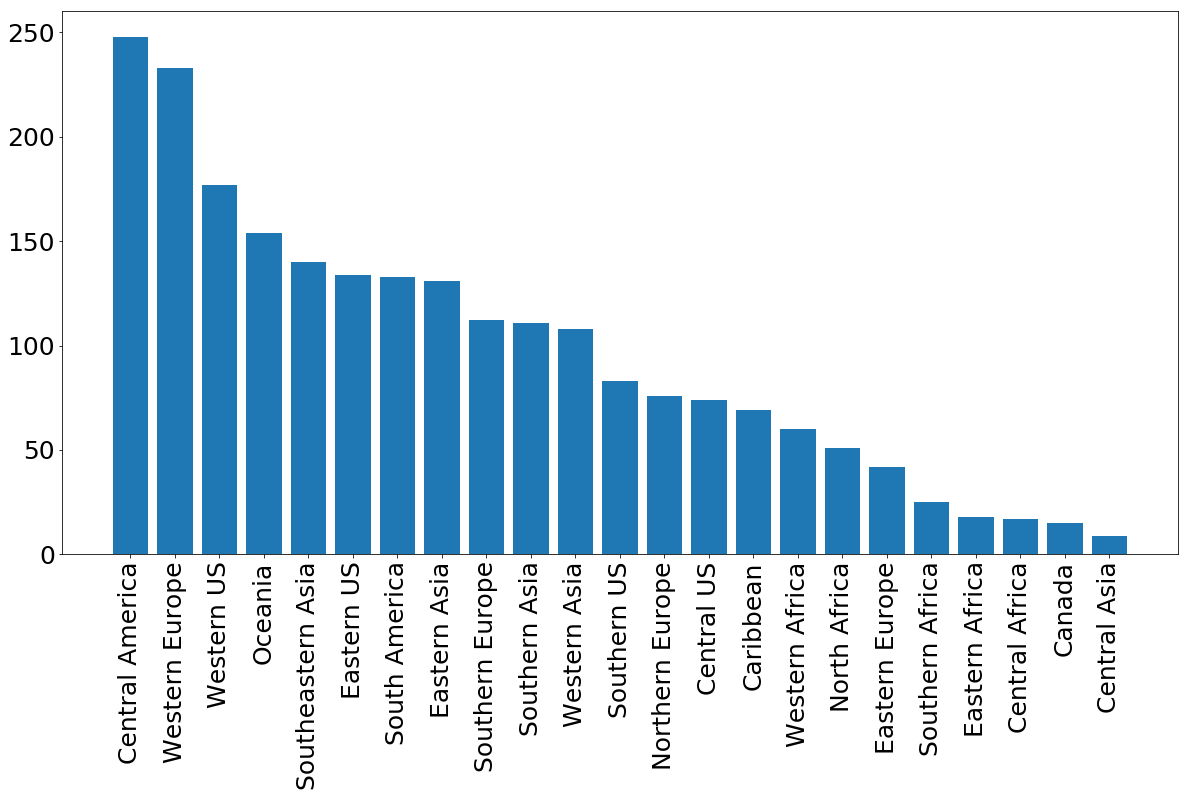

In [114]:
plt.figure(figsize=(20,10))
plt.bar(countries.index, countries['Sales'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25, rotation=90)

In [110]:
#3.4
categories = df_tot[df_tot.Returned == 'Yes'].groupby('Sub.Category').agg({'Sales':'count'}).sort_values(by = 'Sales', ascending = False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

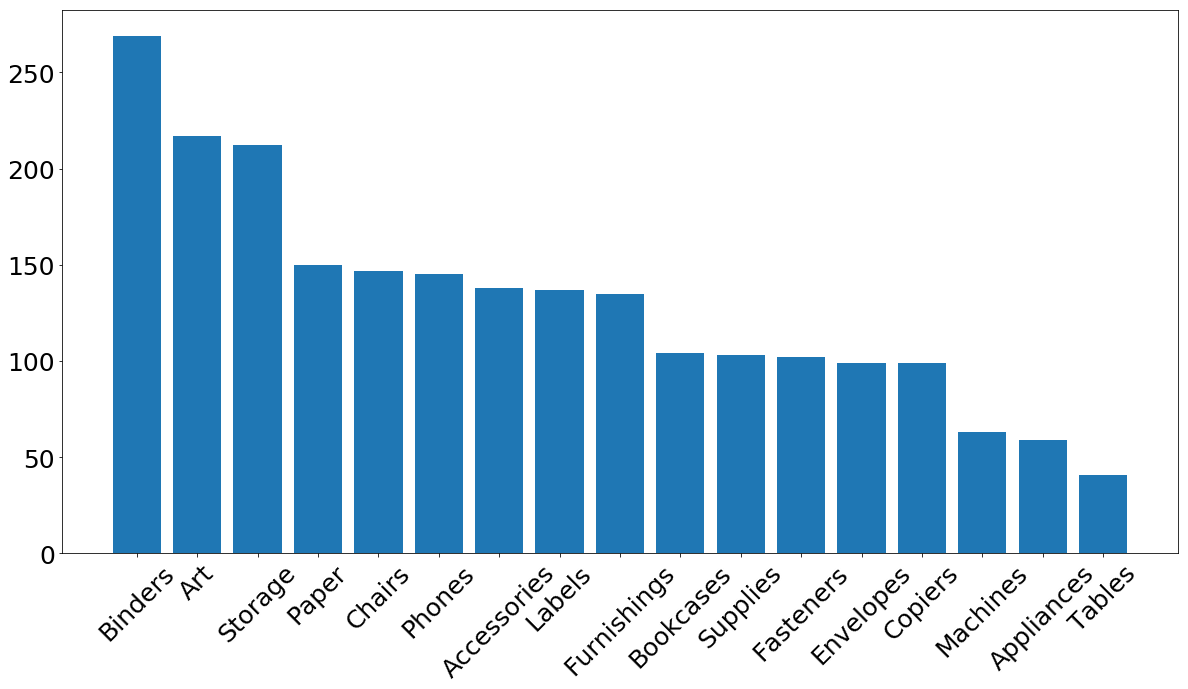

In [112]:
plt.figure(figsize=(20,10))
plt.bar(categories.index, categories['Sales'])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25, rotation=45)